# **URL com o link dos dados utilizados:**

In [ ]:
url = 'https://github.com/alura-cursos/python-analise-chatgpt-assistente/raw/main/Dados/dados_vendas.json'

# **Importar as bibliotecas necessárias:**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_json(url)

In [ ]:
# Importe a função json_normalize
from pandas import json_normalize

# Normalize os dados da coluna "item"
df_item_normalized = json_normalize(df['item'])

# Normalize os dados da coluna "loja"
df_loja_normalized = json_normalize(df['loja'])

# Combine os DataFrames normalizados com o DataFrame original
df = pd.concat([df, df_item_normalized, df_loja_normalized], axis=1)

# Exclua as colunas originais de "item" e "loja" se necessário
df.drop(['item', 'loja'], axis=1, inplace=True)
df

# **Ler o conteúdo da URL sem muita formatação:**

In [ ]:
# Verifica as 5 primeiras linhas:
df.head()

In [ ]:
# Resumo estatístico das colunas numéricas
df.describe()

In [ ]:
# Informações gerais sobre o DataFrame, incluindo tipos de dados e contagem de valores não nulos
df.info()

In [ ]:
# Verificar a contagem de valores únicos em cada coluna
df.nunique()

In [ ]:
# Verificar se há valores duplicados no DataFrame
df.duplicated().sum()

In [ ]:
# Verificar se há valores ausentes (NaN) em cada coluna
df.isnull().sum()

In [ ]:
# Verificar se há valores únicos em colunas específicas, por exemplo, "item_identificador” e “loja_identificador”
df['item_conteudo_gordura'].unique()

# **Arrumando, Removendo ou Substituindo valores nulos, sem padrão ou errados:**

In [ ]:
# Remove valores duplicados
df.drop_duplicates(inplace=True)
df

In [ ]:
# Remove a coluna 'item_quantidade_venda' pois seus valores estão nulos, a coluna está errada e dispensável
df.drop(columns=['item_quantidade_venda'], inplace=True)

In [ ]:
# Define valores médios para valores nulos da coluna 'item_peso'. É possível encontrar a média e outros valores em df.describe()
df['item_peso'].fillna(df['item_peso'].mean(), inplace=True)

In [ ]:
# Substituí os valores nulos por uma frase, exemplo: 'Não registrado'.
df['loja_tamanho'].fillna('Não registrado', inplace=True)

In [ ]:
# Verificar os valores alterados
df.info()

In [ ]:
# Mapeie os valores não padronizados para os valores padronizados
mapeamento = {
    'BTG': 'Baixo Teor de Gordura',
    'reg': 'Regular',
    'baixo teor de gordura': 'Baixo Teor de Gordura'
}

# Use a função replace para substituir os valores na coluna
df['item_conteudo_gordura'] = df['item_conteudo_gordura'].replace(mapeamento)

# Verifique os valores únicos após a substituição
df['item_conteudo_gordura'].unique()

In [ ]:
# Trocas o tipo de dado de uma coluna, no caso de float para int
# "df['nome_da_coluna'] = df['nome_da_coluna'].astype(int)"

# **Visualização de Dados:**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por tamanho de loja, somando as 'vendas_totais' por 'loja_tamanho', por exemplo:
# Pequena - 20, Pequena - 15, Média - 10, Grande - 5, Grande - 5 = Pequena - 35, Média - 10 e Grande - 10
df_agrupado = df.groupby('loja_tamanho')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras
barras = ax.bar(df_agrupado['loja_tamanho'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas acima de cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Tamanho de Loja')
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.xaxis.label.set_color(cor_texto)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por tipo de loja
df_agrupado = df.groupby('loja_tipo')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras
barras = ax.bar(df_agrupado['loja_tipo'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas acima de cada barra
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Tipo de Loja')
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.xaxis.label.set_color(cor_texto)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por categoria de produto
df_agrupado = df.groupby('item_tipo')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_barras = "#e23155"
cor_texto = "#19325c"

# Ordenar o DataFrame por vendas totais (funil)
df_agrupado = df_agrupado.sort_values(by='vendas_totais', ascending=True)

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as barras horizontais
barras = ax.barh(df_agrupado['item_tipo'], df_agrupado['vendas_totais'], color=cor_barras)

# Adicione o total de vendas dentro de cada barra
for bar in barras:
    largura_barra = bar.get_width()
    valor_vendas = largura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(largura_barra, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', va='center', color=cor_texto)

# Configurações adicionais
ax.set_xlabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Categoria de Produto')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Inverter a ordem das categorias de produtos para manter o aspecto de funil
ax.invert_yaxis()

# Exibir o gráfico
plt.tight_layout()
plt.show()

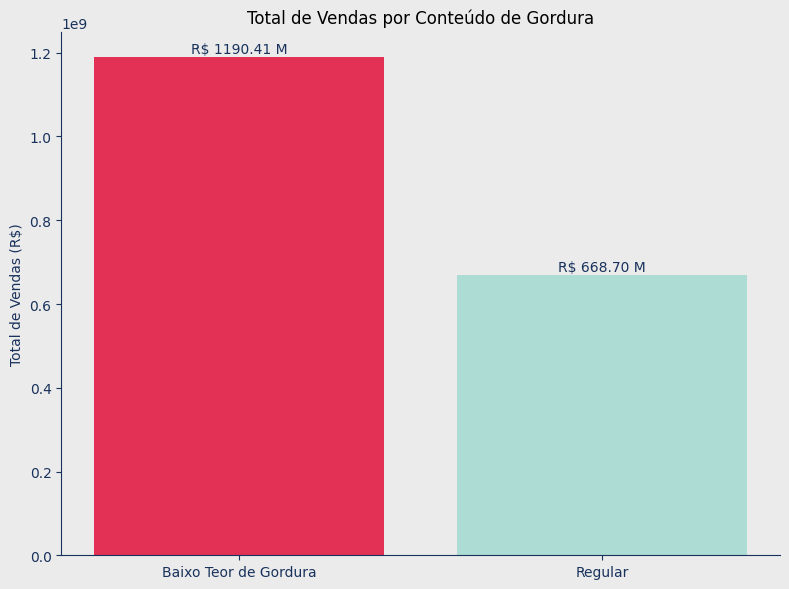

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um DataFrame com os dados agrupados por categoria de quantidade de gordura
df_agrupado = df.groupby('item_conteudo_gordura')['vendas_totais'].sum().reset_index()

# Cores
cor_fundo = "#ebebeb"
cor_baixo_gordura = "#e23155"
cor_regular = "#acdcd3"
cor_texto = "#19325c"

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(cor_fundo)
ax.set_facecolor(cor_fundo)

# Plote as colunas
barras = ax.bar(df_agrupado['item_conteudo_gordura'], df_agrupado['vendas_totais'],
                color=[cor_baixo_gordura, cor_regular])

# Adicione o total de vendas acima de cada coluna
for bar in barras:
    altura_barra = bar.get_height()
    valor_vendas = altura_barra / 1000000  # Converter para milhões
    ax.annotate(f'R$ {valor_vendas:.2f} M', xy=(bar.get_x() + bar.get_width() / 2, altura_barra),
                xytext=(0, 3), textcoords='offset points', ha='center', color=cor_texto)

# Configurações adicionais
ax.set_ylabel('Total de Vendas (R$)')
ax.set_title('Total de Vendas por Conteúdo de Gordura')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(cor_texto)
ax.spines['left'].set_color(cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
ax.xaxis.label.set_color(cor_texto)
ax.yaxis.label.set_color(cor_texto)
ax.grid(False)

# Exibir o gráfico
plt.tight_layout()
plt.show()